In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
path = 'data/ml-1m/users.dat'
userdf = pd.read_csv(path,delimiter='::',header=None,engine='python')
traindf = pd.read_csv(path,delimiter=',',header=None,engine='python')
testdf = pd.read_csv(path,delimiter=',',header=None,engine='python')
ratedf = pd.read_csv(path,delimiter='::',header=None,engine='python')
moviedf = pd.read_csv(path,index_col=0,delimiter='::',header=None,engine='python')

In [111]:
# group rating by user  ID
user_gb = ratedf[2].groupby(ratedf[0])
female = list()
male = list()
x = np.zeros(6040)
y = np.zeros(6040)
for i in range(1,6041):
    rate = ratedf.loc[user_gb.groups[i]][2].mean()
    y[i-1] = rate
    if (userdf.loc[i-1])[1]=='F':
        female.append(rate)
        x[i-1] = 1
    else: male.append(rate)
    
# # group rating by movie
# movie_gb = ratedf.groupby(1)
# # true rating
# test_y = testdf[2]
# movies = set(traindf[1])

In [116]:
from scipy.stats import ttest_ind
ttest_ind(np.array(female),np.array(male),equal_var=False)

Ttest_indResult(statistic=3.1107603650137001, pvalue=0.001882101864779079)

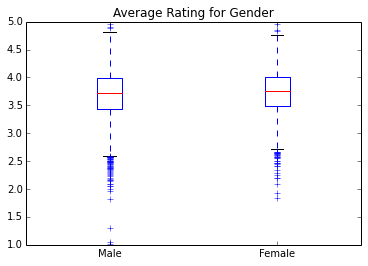

In [110]:
plt.boxplot([male,female])
plt.xticks([1, 2], ['Male', 'Female'])
plt.title('Average Rating By Gender')
plt.show()

In [167]:
age_dict = dict()
for i in [1,18,25,35,45,50,56]:
    age_dict[i]=list()
for i in range(1,6041):
    rate = ratedf.loc[user_gb.groups[i]][2].mean()
    age_dict[(userdf.loc[i-1])[2]].append(rate)
import operator
age_dict = sorted(age_dict.items(), key=operator.itemgetter(0))

In [168]:
ages = [v[1] for v in age_dict]
for i in range(7):
    for j in range(7):
        if j > i: 
            t,p = ttest_ind(np.array(ages[i]),np.array(ages[j]),equal_var=False)
            print i,j,p

0 1 0.99109038984
0 2 0.156987507138
0 3 0.000345206461194
0 4 4.19270238447e-05
0 5 2.70360772246e-06
0 6 9.56205932059e-08
1 2 0.00377566931131
1 3 1.20680559166e-11
1 4 1.82531305707e-11
1 5 5.0541177998e-14
1 6 1.09659247046e-14
2 3 4.7824115739e-07
2 4 2.22189887885e-07
2 5 9.1824638934e-10
2 6 8.21913685205e-11
3 4 0.19486828815
3 5 0.01832292423
3 6 0.000586197761593
4 5 0.337827068173
4 6 0.0310929064853
5 6 0.194568831644


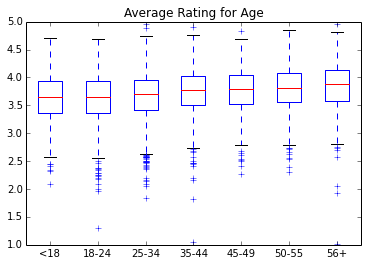

In [170]:
plt.boxplot([v[1] for v in age_dict])
plt.xticks([1, 2,3,4,5,6,7], ['<18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.title('Average Rating By Age')

plt.show()

In [126]:
occ_dict = dict()
for i in range(21):
    occ_dict[i]=list()
for i in range(1,6041):
    rate = ratedf.loc[user_gb.groups[i]][2].mean()
    occ_dict[(userdf.loc[i-1])[3]].append(rate)


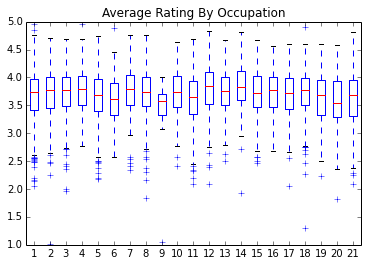

In [191]:
plt.boxplot([v for v in occ_dict.itervalues()])
plt.title('Average Rating By Occupation')
plt.show()

In [174]:
import re
pat = re.compile("\(([0-9]+)\)")
print pat.search('aaa(1995)').group(1)
years = [(int(pat.search(s).group(1)[2:])-1)/10 for s in moviedf[1]]
years = [9 if x==-1 else x for x in years]
moviedf['year'] = years
print moviedf.tail()

1995
                               1               2  year
0                                                     
3948     Meet the Parents (2000)          Comedy     9
3949  Requiem for a Dream (2000)           Drama     9
3950            Tigerland (2000)           Drama     9
3951     Two Family House (2000)           Drama     9
3952       Contender, The (2000)  Drama|Thriller     9


In [143]:
movie_gb = ratedf[2].groupby(ratedf[1])

In [ ]:
year = dict()
for i in range(0,10):
    year[i] = list()
for j,i in enumerate(moviedf.index):
    if j%100==0: print j
    if i not in list(movie_gb.keys): continue
    rate = ratedf.loc[movie_gb.groups[i]][2].mean()
    year[(moviedf.loc[i])['year']].append(rate)

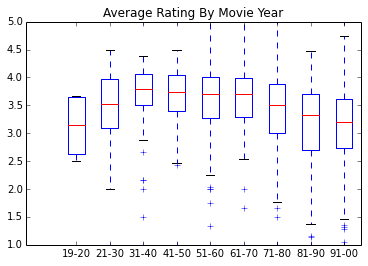

In [192]:
plt.boxplot([v[1] for v in year])
plt.xticks(np.linspace(2,10,9),['19-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-00'])
plt.title('Average Rating By Movie Year')
plt.show()

In [ ]:
genre_dict = dict()
genres=['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
 'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
for g in genres:
    genre_dict[g]=list()
for j,i in enumerate(moviedf.index):
    if j%100==0: print j
    if i not in list(movie_gb.keys): continue
    rate = ratedf.loc[movie_gb.groups[i]][2].mean()
    for g in moviedf.loc[i][2].split('|'):
        genre_dict[g].append(rate)

In [184]:
moviedf.head()

,1,2,year
0,,,
1,Toy Story (1995),Animation|Children's|Comedy,9
2,Jumanji (1995),Adventure|Children's|Fantasy,9
3,Grumpier Old Men (1995),Comedy|Romance,9
4,Waiting to Exhale (1995),Comedy|Drama,9
5,Father of the Bride Part II (1995),Comedy,9


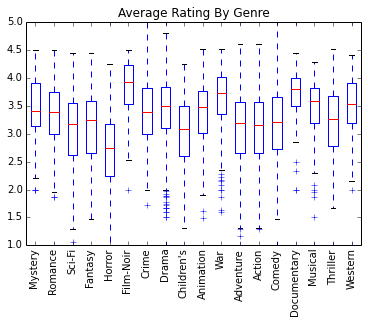

In [193]:
plt.boxplot([v for v in genre_dict.itervalues()])
plt.xticks(np.linspace(1,18,18),[k for k in genre_dict.iterkeys()],rotation='vertical')
plt.title('Average Rating By Genre')
plt.show()